# Introduction
Fill sth here whenever you are inspired.]

In [16]:
%load_ext autoreload
%autoreload 2

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Example: Polynomial Curve Fitting
Assume that we have two real valued quantities $x, t \in \mathbb{R}$ that are related via some "map" that we are interested in "learning". We will generate artificial data for this example so that we already know the function that relates $t$ and $x$, for example: t = $\sin(2 \pi x)$ plus some random noise drawn from a normal distribution. In this case the variables $x,t \in [0,1]$.

Suppose that we are given $N$ samples (observations) of this relation between $x$ and $t$. This is, we are given a vector $\mathbf{X} = (x_1, x_2, \dots, x_N)^T$ together with $N$ observations of the target variable $\mathbf{t} = (t_1, t_2, \dots, t_N)^T$.

In [57]:
x = np.arange(0,1,0.01)
rand_noise = np.random.normal(0, 0.05, size = 100)
t = np.sin(2* np.pi *x) + rand_noise

Text(0, 0.5, 't')

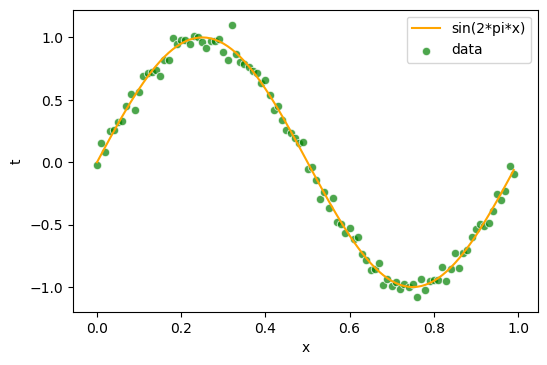

In [58]:
fig, ax = plt.subplots(dpi = 100)
sns.scatterplot(x,t, ax = ax, color = 'green', label = 'data', alpha = 0.7)
sns.lineplot(x,np.sin(2* np.pi *x), color = 'orange', label = 'sin(2*pi*x)')
ax.set_xlabel('x')
ax.set_ylabel('t')

Our goal is to use the observation data (training dataset) to make predictions about the target variable $t$. Such that we can return the value $\hat{t}$ for any observation new $\hat{x}$, new in the sense that it has not been seen by our "prediction method" whatever it is.

Our first approach will be a simple ploynomial fit. This means that we are going to fit data using a polynomial function of the form:
$$y(x, \vec{w}) = w_0 + w_1 x + w_2 x^2 + \dots + w_M x^M = \sum_{j=0}^{M}w_j x^j,$$

where $M$ is the order of the polynomial. Notice that this function is non-linear on the variable $x$ but is linear in the parameters $w$. Functions of this kind, that depend linearly on the unkwnon parameters are called **linear models**.

How to determine the values of these coefficients? Well, the answer to this question is the at the core of what we know as **Machine Learning**. The values of the coefficients $\vec{w}$ are going to be estimated by fotting the polynomial to the observations (training data), such that an **error function** is minimized. This error function should measure the misfit between the output of the function $y(x, \vec{w})$ and the actual observation (training data). One simple choice of such error function is given by the sum of the squares of the errors between predictions and observations, namely:
$$E(\vec{w}) = \dfrac{1}{2}\sum_{n=1}^{N}\left(y(x_n, \vec{w})- t_n\right)^2.$$

Note that $E(\vec{w}) = 0$ when $y(x_n, \vec{w}) = t_n$ for all $n$, this is, the error is null when the predictions coincide with the observations.